<a href="https://colab.research.google.com/github/cindydkurniaty/PYTN_Prakerja_Cindy-Dwi_Kurniaty_Yusuf/blob/main/PYTN_Prakerja_Cindy_Dwi_Kurniaty_Yusuf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project Pelatihan Kartu Prakerja dengan Tema "Belajar Mengembangkan Model Database dengan Python untuk Menjadi Analis Database"**

---



> Menggunakan dataset dari website kaggle. 
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


Database ini memiliki informasi tentang pasien rumah sakit. kolom "target" punya nilai 0 (sehat) dan 1 (sakit). 

Informasi mengenai atribut-atribut (variabel-variabel) dari dataset:

1.age

2.sex

3.chest pain type (4 values)

4.resting blood pressure

5.serum cholesterol in mg/dl

6.fasting blood sugar > 120 mg/dl

7.resting electrocardiographic results (values 0,1,2)

8.maximum heart rate achieved

9.exercise induced angina

10.oldpeak = ST depression induced by exercise relative to rest

11.the slope of the peak exercise ST segment

12.number of major vessels (0-3) colored by fluoroscopy

13.thal: 3 = normal; 6 = fixed defect; 7 = reversible defect


> Melakukan Analisis data (Analisis Data Eksplorasi Data dan Pembuatan Model)

1. Menampilkan hasil Analisis Eksplorasi Data untuk melihat karakteristik dari data
2. Membuat model menggunakan Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, dan Random Forest. 

*   Memasukkan packages yang dibutuhkan untuk melakukan analisis data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix, accuracy_score

*   Mengimpor dan menampilkan dataset yang telah di ambil dari website kaggle





In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/cindydkurniaty/PYTN_Prakerja_Cindy-Dwi_Kurniaty_Yusuf/main/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


*   Menampilkan informasi mengenai dataset yang digunakan

Diketahui dataset ini memiliki jumlah observasi sebanyak 1025 pasien dan variabel sebanyak 14 (dengan 13 variabel independen dan 1 variabel dependen)

Tidak terdapat missing value pada dataset ditandai dengan jumlah entri semua variabel sebanyak jumlah observasi yaitu 1025

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB



> Analisis Eksplorasi Data





Adalah proses investigasi awal pada sebuah data untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis, dan memeriksa asumsi melalui statistik ringkasan dan representasi grafis (visual)



**Penggambaran grafik untuk variabel berskala kategorik**

*** Sex (gender)**

1 = laki-laki

0 = perempuan

Pada dataset ini jumlah pasien laki-laki lebih banyak daripada pasien perempuan dengan presentase pasien laki-laki 69,6% dan presentase pasien perempuan 30,4% berdasarkan pada gambar "pie chart untuk variabel sex (gender)" 


*************************
Banyaknya jumlah gender
*************************
1    713
0    312
Name: sex, dtype: int64 



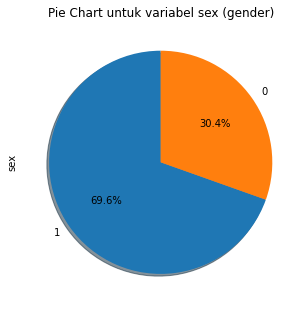

In [ ]:
print('*'*25)
print('Banyaknya jumlah gender')
print('*'*25)
print(df.sex.value_counts(dropna=False),'\n')

df['sex'].value_counts().plot(kind='pie', 
                              figsize=(5, 6), 
                              autopct='%1.1f%%',     
                              startangle=90,     
                              shadow=True)
plt.title('Pie Chart untuk variabel sex (gender)')
plt.show()

*** chest pain type/cp (tipe nyeri dada)**

terdapat 4 tipe yaitu:
Type 0, Type 1, Type 2, Type 3

Berdasarkan pada gambar "pie chart untuk variabel chest pain type (tipe nyeri dada)" , pasien yang mengalami tipe nyeri dada Type 0 adalah yang terbanyak dengan presentase 48,5%. Adapun Type 1 dan Type 2 masing-masing 16,3% dan 27,7%. Dan tipe nyeri dada dengan presentase paling sedikit adalah Type 3 dimana presentasenya yaitu 7,5%

*************************
Banyaknya tipe nyeri dada
*************************
0    497
2    284
1    167
3     77
Name: cp, dtype: int64 



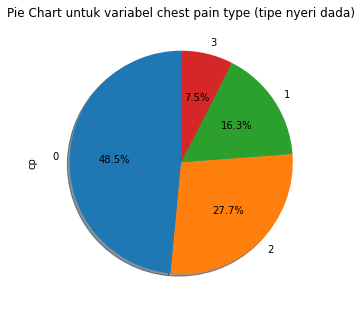

In [ ]:
print('*'*25)
print('Banyaknya tipe nyeri dada')
print('*'*25)
print(df.cp.value_counts(dropna=False),'\n')
df['cp'].value_counts().plot(kind='pie', 
                              figsize=(5, 6), 
                              autopct='%1.1f%%',     
                              startangle=90,     
                              shadow=True)
plt.title('Pie Chart untuk variabel chest pain type (tipe nyeri dada)')
plt.show()

*   **fasting blood sugar/fbs (Kadar gula darah puasa)**

pemeriksaan untuk mengukur gula darah seseorang setelah puasa semalaman
Diketahui

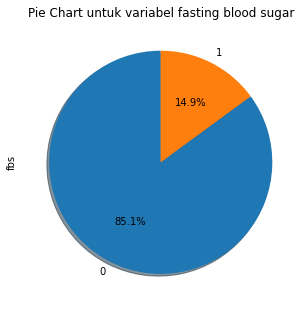

In [ ]:
df['fbs'].value_counts().plot(kind='pie', 
                              figsize=(5, 6), 
                              autopct='%1.1f%%',     
                              startangle=90,     
                              shadow=True)
plt.title('Pie Chart untuk variabel fasting blood sugar')
plt.show()

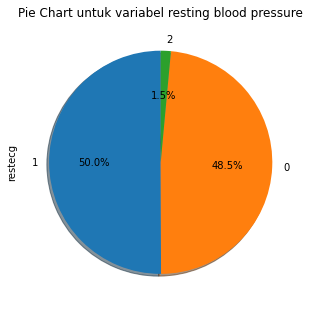

In [ ]:
df['restecg'].value_counts().plot(kind='pie', 
                              figsize=(5, 6), 
                              autopct='%1.1f%%',     
                              startangle=90,     
                              shadow=True)
plt.title('Pie Chart untuk variabel resting blood pressure')
plt.show()

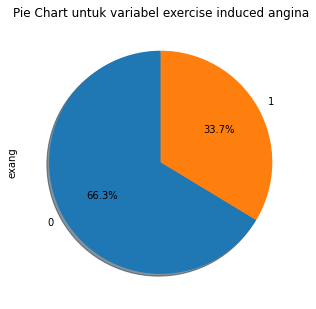

In [ ]:
df['exang'].value_counts().plot(kind='pie', 
                              figsize=(5, 6), 
                              autopct='%1.1f%%',     
                              startangle=90,     
                              shadow=True)
plt.title('Pie Chart untuk variabel exercise induced angina')
plt.show()

In [ ]:
kategori=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[kategori] = df[kategori].astype(object)
df.select_dtypes(exclude='object').describe()

,age,trestbps,chol,thalach,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


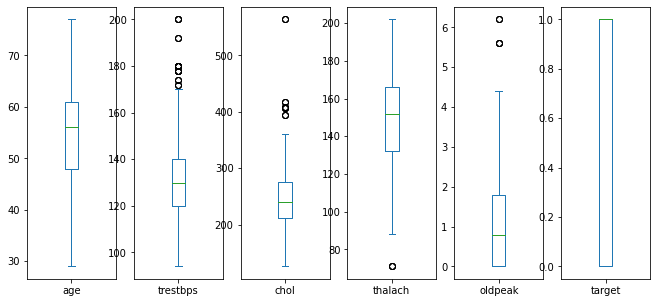

In [ ]:
df.select_dtypes(exclude='object').plot(kind='box',subplots=True,layout=(1,8),sharex=False, figsize=(15,5))
plt.show()

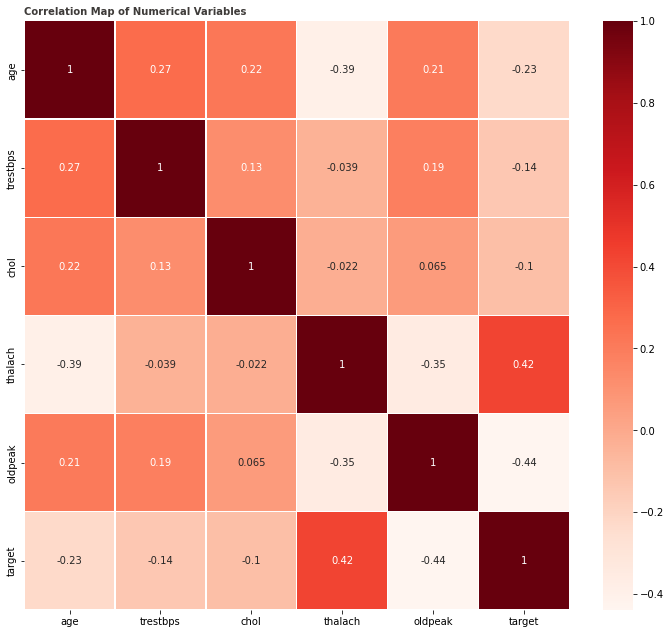

In [ ]:
plt.figure(figsize=(10, 9))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='Reds', linewidths=0.2)
plt.title('Correlation Map of Numerical Variables', fontweight='heavy',
          fontsize='10', fontfamily='sans-serif', loc='left', color='#3E3B39')
plt.tight_layout(rect=[0, 0.02, 1, 1.01])

In [ ]:
x = df.drop(['target'], axis=1)
y = df['target']
x=pd.get_dummies(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

In [ ]:
x_train = MinMaxScaler().fit_transform(x_train)

In [ ]:
model_LR= LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model_LR.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [ ]:
x_test_LR = MinMaxScaler().fit_transform(x_test)

In [ ]:
y_pred_LR = model_LR.predict(x_test_LR)

In [ ]:
akurasi_lr=accuracy_score(y_pred_LR, y_test)
print(akurasi_lr)

0.8543689320388349


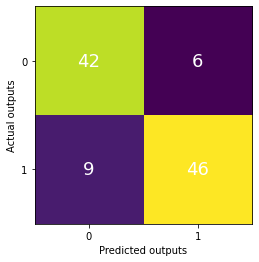

In [ ]:
cm = confusion_matrix(y_test, y_pred_LR)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=18)
plt.show()

In [ ]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    x_test_KNN = MinMaxScaler().fit_transform(x_test)
    pred_i = knn.predict(x_test_KNN)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

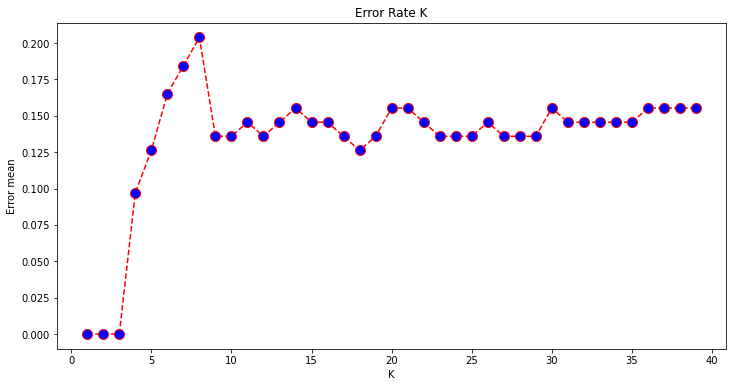

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [ ]:

KNNClassifier= KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
x_test_KNN = MinMaxScaler().fit_transform(x_test)
y_pred_KNN= KNNClassifier.predict(x_test_KNN)
y_pred_KNN

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
akurasi_knn=accuracy_score(y_test, y_pred_KNN)
print(akurasi_knn)

1.0


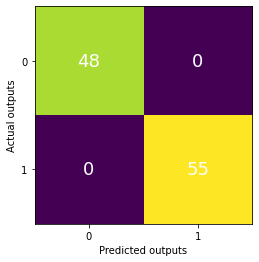

In [ ]:
cm = confusion_matrix(y_test, y_pred_KNN)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=18)
plt.show()

In [ ]:
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [ ]:
x_test_svm=MinMaxScaler().fit_transform(x_test)
y_pred_svm=svm_model.predict(x_test_svm)

In [ ]:
akurasi_svm=accuracy_score(y_test, y_pred_svm)
print(akurasi_svm)

0.912621359223301


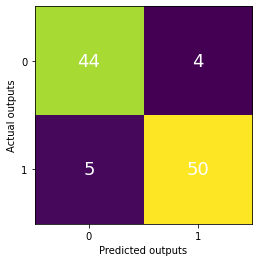

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=18)
plt.show()

In [ ]:
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
x_test_svm=MinMaxScaler().fit_transform(x_test)
y_pred_dt=dt.predict(x_test_svm)

In [ ]:
akurasi_dt=accuracy_score(y_test,y_pred_dt)
print(akurasi_dt)

0.8640776699029126


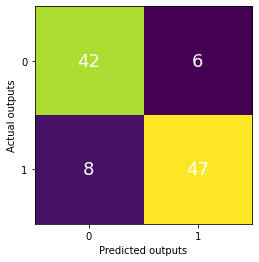

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=18)
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
x_test_rf=MinMaxScaler().fit_transform(x_test)
y_pred_rf=rf.predict(x_test_rf)

In [ ]:
akurasi_rf=accuracy_score(y_test,y_pred_rf)
print(akurasi_rf)

0.970873786407767


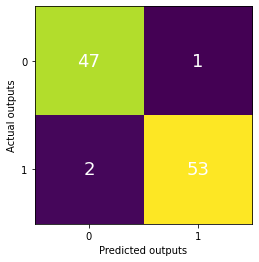

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=18)
plt.show()

In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
x_test_nb=MinMaxScaler().fit_transform(x_test)
y_pred_nb=nb.predict(x_test_nb)

In [ ]:
akurasi_nb=accuracy_score(y_test,y_pred_nb)
print(akurasi_nb)

0.8737864077669902


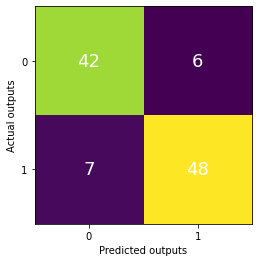

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=18)
plt.show()

In [ ]:
print("Logistic Regression  : ", akurasi_lr*100)
print("KNN                  : ", akurasi_knn*100)
print("SVM                  : ", akurasi_svm*100)
print("Decision Tree        : ", akurasi_dt*100)
print("Random Forest        : ", akurasi_rf*100)
print("Naive Bayes          : ", akurasi_nb*100)

Logistic Regression  :  85.43689320388349
KNN                  :  100.0
SVM                  :  91.2621359223301
Decision Tree        :  86.40776699029125
Random Forest        :  97.0873786407767
Naive Bayes          :  87.37864077669903


Setelah menerapkan 6 algortima diatas diperoleh algoritma KNN yang paling baik untuk membuat model yang dibuktikan dengan nilai akurasi mencapai 100%